In [2]:
import json
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
import meep_csg as msg

# corner1 = msg.Sphere(mp.Vector3(-1,1,0),1)
# corner2 = msg.Sphere(mp.Vector3(1,1,0),1)
# corner3 = msg.Sphere(mp.Vector3(-1,-1,0),1)
# corner4 = msg.Sphere(mp.Vector3(1,-1,0),1)
# body1 = msg.Box(mp.Vector3(4,2,mp.inf),mp.Vector3())
# body2 = msg.Box(mp.Vector3(2,4,mp.inf),mp.Vector3())
# hole = msg.Sphere(mp.Vector3(0.75,0.5,0),0.75)

# shape = msg.Union(corner1, corner2, corner3, corner4, body1, body2).subtract(hole)
# with open("shape.json", "w") as file:
#     json.dump(shape.encode(), file)

with open("shape.json", "r") as file:
    import json
    data = json.load(file)
    shape = msg.decode_json(data)

cell = mp.Vector3(16,8,0)

sources = [mp.Source(mp.ContinuousSource(frequency=0.15),
                component=mp.Ez,
                center=mp.Vector3(-7,0))]

pml_layers = [mp.PML(1.0)]

resolution = 10

sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    material_function=msg.material_function(shape, mp.Medium(epsilon=12)),
                    sources=sources,
                    resolution=resolution)


Using MPI version 3.1, 1 processes


In [3]:
sim.run(until=200)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000299931 s
Working in 3D dimensions.
Computational cell is 16 x 8 x 8 with resolution 10
subpixel-averaging is 43.4009% done, 5.22271 s remaining
subpixel-averaging is 84.9419% done, 0.710339 s remaining
subpixel-averaging is 43.8142% done, 5.13679 s remaining
subpixel-averaging is 85.3552% done, 0.686769 s remaining
subpixel-averaging is 43.1942% done, 5.27904 s remaining
subpixel-averaging is 84.7352% done, 0.72093 s remaining
time for set_epsilon = 64.6448 s
-----------
run 0 finished at t = 1.0 (20 timesteps)


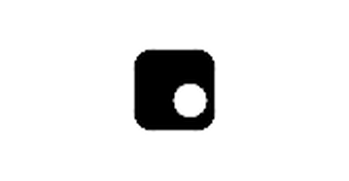

In [3]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

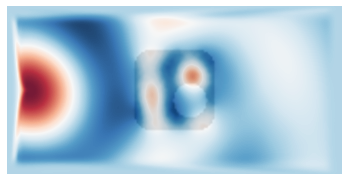

In [4]:
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()